# Image model


    An image's file name is == to the 'image_id' in the annotations/captions_*.json file

In [174]:
import json
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from nsd_access import NSDAccess

In [275]:
mscoco_path = "/home/hpcgies1/rds/hpc-work/NIC/Data/Images/mscoco_2017/"
split = 'Train'
image_path = f"{mscoco_path}/{split}/{split.lower()}2017"
caps_path = f"{mscoco_path}/annotations/captions_{split.lower()}2017.json"

In [276]:
with open(caps_path, 'r') as f:
     caps = json.load(f)

In [277]:
id_to_caps = defaultdict(list)
for i in caps['annotations']:
    id_to_caps[ i['image_id'] ].append( i['caption'] )
print(len(id_to_caps))

118287


In [278]:
img_id = 475150 # 319369   # Val set
img_id = 58792 # 528595 # 545071  # Train set
img_id_full = f"{img_id:012}"

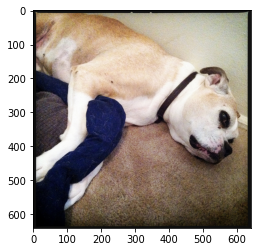

In [279]:
img = plt.imread(f"{mscoco_path}/{split}/{split.lower()}2017/{img_id_full}.jpg")
plt.imshow(img)
plt.show()

In [280]:
print("\n".join(id_to_caps[img_id]))

A brown and white dog laying on a floor.
a dog laying on the ground in a room. 
a dog laying on the floor between a blue bed and a wall 
a cream colored dog lying on a brown carpet.
A dog that ls laying down on a carpet.


In [258]:
val_images = os.listdir(f"{mscoco_path}/{split}/{split.lower()}2017/")

In [259]:
int(val_images[1].split(".")[0])

573943

## Create a image_file_id <--> captions dictionary

    Gives us the captions for an image specified by the ID

In [260]:
val_images_to_captions = {}
for i in val_images:
    i = int(i.split(".")[0])
    c = id_to_caps[i]
    val_images_to_captions[i] = c[:5]

In [267]:
df = pd.DataFrame.from_dict(val_images_to_captions, orient='index')
df.index.name='cocoId'
# df.to_csv(f"{mscoco_path}/{split.lower()}_id_to_captions.csv")
df.shape

(5000, 5)

In [268]:
df.head(10)

,0,1,2,3,4
cocoId,,,,,
441442,A professional rider is riding a horse outside,a man is riding a brown horse down a green field,The person is riding a horse in the pen.,A young girl rides her horse in the middle of ...,a girl in full riding gear riding a brown horse
573943,Parking lot full of different colored semi tru...,"Yellow, white and blue trucks are parked in a ...",A wharehouse accomodates a vast array of big t...,A building with many trucks of different color...,A parking lot with various trucks in it next t...
163118,two people jumping up to try to catch a frisbee,Two guys leap for the Frisbee as they play the...,The two men are jumping to get the frisbee.,Two young men playing a game of frisbee.,Two men playing frisbe on an indoor court.
554291,A small kitten standing in a blue hat on top ...,a cat sitting inside of a plastic bucket,A cat's image is blurred as he tumbles in a bo...,A kitty cat jumping out of a blue bowl,A kitten climbing out of a blue bowl.
448410,A train parked at a train stop next to another...,A train is entering its stop with people waiti...,A train car pulls into a train station where t...,A train is stopping to pick up passengers on t...,THERE IS A TRAIN COMING DOWN ON THE TRACKS
479248,A flat screen tv on a wooden tv stand.,"An entertainment center with a tv, movies, and...","The movie ""Walk the Line"" is playing on a flat...",The TV is placed in a well decorated room.,A TV with a man singing on it and the room has...
257865,A man with a tennis racquet is dressed in white.,an image of a man that is wiping his eye,A man in white shirt and hat holding a tennis ...,A man holding a tennis racket picks rubs his eye.,The older man is playing tennis on the court.
577864,Three people are playing with a red kick ball.,3 People in a dirt field playing soccer.,Three people are kicking around an orange ball.,Three people playing ball game on sandy ground.,a couple of people are kicking a ball in a field
170613,Surfers holding boards standing in water at oc...,Two people standing in the surf with their sur...,A couple of women are at the beach with surfbo...,A couple of people with surfboards in the water.,two people holding surf boards in a body of water


In [274]:
df.loc[441442].values

array(['A professional rider is riding a horse outside',
       'a man is riding a brown horse down a green field',
       'The person is riding a horse in the pen.',
       'A young girl rides her horse in the middle of a course.',
       'a girl in full riding gear riding a brown horse'], dtype=object)

In [176]:
nsd_loader = NSDAccess("/home/hpcgies1/rds/hpc-work/NIC/NSD/")
nsd_loader.stim_descriptions = pd.read_csv(nsd_loader.stimuli_description_file, index_col=0)

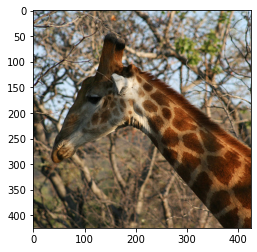

In [182]:
img = nsd_loader.read_images([5])
plt.imshow(img[0])
plt.show()

## Create nsd_key -> cocoID dict

    Tells us which coco images are part of nsd set

In [194]:
xx = pd.read_csv(nsd_loader.stimuli_description_file)
xx.shape

(73000, 41)

In [186]:
xx.head(6)

,Unnamed: 0,cocoId,cocoSplit,cropBox,loss,nsdId,flagged,BOLD5000,shared1000,subject1,...,subject5_rep2,subject6_rep0,subject6_rep1,subject6_rep2,subject7_rep0,subject7_rep1,subject7_rep2,subject8_rep0,subject8_rep1,subject8_rep2
0,0,532481,val2017,"(0, 0, 0.1671875, 0.1671875)",0.100000,0,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
1,1,245764,val2017,"(0, 0, 0.125, 0.125)",0.000000,1,False,False,False,0,...,0,0,0,0,13985,14176,28603,0,0,0
2,2,385029,val2017,"(0, 0, 0.125, 0.125)",0.000000,2,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
3,3,311303,val2017,"(0, 0, 0.16640625, 0.16640625)",0.125000,3,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0
4,4,393226,val2017,"(0, 0, 0.125, 0.125)",0.133333,4,False,False,False,0,...,0,13720,22861,23023,0,0,0,0,0,0
5,5,475150,val2017,"(0, 0, 0.16640625, 0.16640625)",0.000000,5,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
# Holds image_id which are part of the NSD set
nsd_img_ids = {}

for i in range(xx.shape[0]):
    nsd_key = i + 1
    if xx.iloc[i]['subject2'] == 1:
        nsd_img_ids[nsd_key] = xx.iloc[i]['cocoId'] 

In [266]:
df = pd.DataFrame.from_dict(nsd_img_ids, orient='index', columns=['cocoId'])
df.index.name='nsd_key'
print(df.shape)
df.to_csv(f"{mscoco_path}/nsd_key_to_cocoID_sub2.csv")
df.head()

(10000, 1)


,cocoId
nsd_key,
6,475150
37,8277
45,290833
55,540932
58,196759


In [292]:
id_to_idx = pd.read_csv(f"{mscoco_path}/val_img_id_to_idx.csv")

id_to_idx.head()

,cocoId,idx
0,441442,0
1,573943,1
2,163118,2
3,554291,3
4,448410,4


In [290]:
id_to_idx['idx'].loc[id_to_idx['cocoId'] == 448410].values[0]

4

In [308]:
df = pd.read_csv(f"{mscoco_path}/train_id_to_captions.csv")
df.head()

,cocoId,0,1,2,3,4
0,545071,A pile of cardboard sitting on top of a floor ...,Someone left all of their tools on the floor.,Assortment of craft like items on cardboard o...,A bunch of assembly tools are on a cardboard box.,a few tools on a wooden floor inside the build...
1,528595,A group of people including children and adult...,A number of people riding a miniature train.,The people are riding on the small train.,A group of people varied in ages are riding in...,A group of people ride on a very small train.
2,58792,A brown and white dog laying on a floor.,a dog laying on the ground in a room.,a dog laying on the floor between a blue bed a...,a cream colored dog lying on a brown carpet.,A dog that ls laying down on a carpet.
3,426888,There is a bowl of fruit on the counter next t...,Bowl of fruit containing bananas and oranges w...,A glass sits on top of some fruits set on a ta...,A pair of glasses sitting on a bowl of banana's.,A bunch of bananas in a bowl and wearing glass...
4,239616,A woman sitting up against a giant bear statue.,A woman standing with large statues of a bear.,Woman posing in between a large teddy bear sta...,A woman poses for a picture in front of a ston...,A woman posing in between a large teddy bear'...


In [307]:
df_dict = defaultdict(list)

In [320]:
for i in range(df.shape[0]):
    temp = df.iloc[i].values
    df_dict[temp[0]] = temp[1:]


In [321]:
df_dict[545071]

array(['A pile of cardboard sitting on top of a floor with office supplies.',
       'Someone left all of their tools on the floor.',
       'Assortment of craft like items on cardboard  on floor.',
       'A bunch of assembly tools are on a cardboard box.',
       'a few tools on a wooden floor inside the building.'], dtype=object)